
# ASSIGNED Linear regression

One way to solve for rate law parameters is called the integral method. For example, in a batch reactor for a first order reaction we know that $\frac{dC_A}{dt} = -k C_A$ which we can solve for $C_A = C_{A0} \exp(-k t)$.

We can then plot $\ln(C_A/C_{A0})$ vs. $t$, and it should be linear.

For a second order reaction, we can do something similar, but we get $\frac{1}{C_A} = \frac{1}{C_{A0}} + k t$. So a plot of $\frac{1}{C_A}$ vs $t$ would be linear.

Given the information below:

1.  Show whether the reaction is first order or second order.
2.  Use linear regression to obtain the rate constant and the confidence interval (do not forget the units).
3.  Show your fit in a plot and discuss what your parameters mean.



In [1]:
t = np.array([0, 50, 100, 150, 200, 250, 300]) # 1 / min
Ca = np.array([0.05, 0.038, 0.0306, 0.0256, 0.0222, 0.0195, 0.0174]) # mol / L


# Solution

First you should make the two plots.



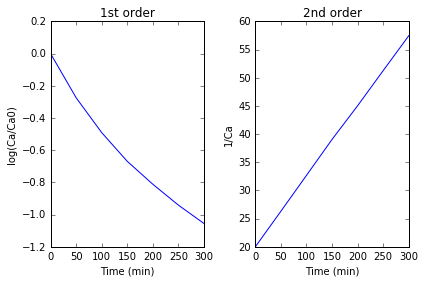

In [3]:
import numpy as np

t = np.array([0, 50, 100, 150, 200, 250, 300]) # 1 / min
Ca = np.array([0.05, 0.038, 0.0306, 0.0256, 0.0222, 0.0195, 0.0174])

Ca0 = Ca[0]

%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(t, np.log(Ca / Ca0))
plt.xlabel('Time (min)')
plt.ylabel('log(Ca/Ca0)')
plt.title('1st order')

plt.subplot(1, 2, 2)
plt.title('2nd order')
plt.plot(t, 1 / Ca)
plt.xlabel('Time (min)')
plt.ylabel('1/Ca')
plt.tight_layout()

The 2<sup>nd</sup> order plot is more linear, so we conclude that this reaction is probably second order. Now we can do the regression on that data.



k = [ 0.12344463  0.1261434 ] L/mol/min


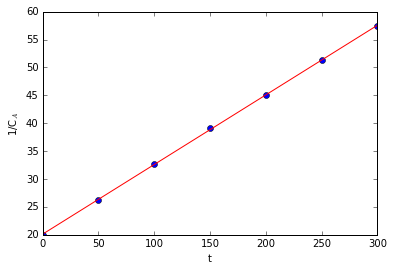

In [4]:
from pycse import regress

X = np.column_stack([t**0, t])
y = 1 / Ca

p, pint, se = regress(X, y, alpha=0.05)

print('k = {} L/mol/min'.format(pint[1]))

# always show the fit
plt.plot(t, y, 'bo')
plt.plot(t, X @ p, 'r-')
plt.xlabel('t')
plt.ylabel('1/C$_A$')

This confidence interval seems pretty small, so we have a pretty high degree of certainty about the rate constant for the second order reaction. You can also see that the fit goes through the data very well.

